# Problem Statement-

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

In [1]:
#Let's start with importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read csv file and convert into Dataframe
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv")
data

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


# 
Observation-

The features in the above data set are-

- months_as_customer     

- age    

- policy_state 

- policy_csl 

- policy_deductable  

- policy annual premium

- umbrella limit

- insured_sex

- insured_education_level

- insured_occupation

- insured_hobbies

- insured_relationship

- capital-gains

- capital-loss

- incident_date

- incident_type

- collision_type

- incident_severity

- authorities_contacted

- incident_state

- incident_city

- incident_hour_of_the_day

- number_of_vehicles_involved

- property_damage

- bodily_injuries

- witnesses

- police_report_available

- total_claim_amount

- injury_claim

- property_claim

- vehicle_claim

- auto_make

- auto_model

- auto_year
 
The label in the given dataset is-

- fraud_reported  

The columns not required-

- policy number      
         - Each customer has its own unique policy number, not influencing the model
- insured_zip
         - Almost all policies have a unique zip
- incident_location
         - Almost all incidents have a unique incident location
- _c39
         - As the entire column is empty

In [7]:
#dropping unwanted columns
data=data.drop(columns=["policy_number", "insured_zip", "incident_location", "_c39"])

In [8]:
#shape of file
data.shape

(1000, 36)

In [9]:
# Checking for data types of the columns
data.dtypes

months_as_customer               int64
age                              int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries          

# 
As there are object datatypes, we will apply encoding techniques

In [10]:
# Checking for null values
data.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_c

In [11]:
# Checking for null values in object datatype columns

for column in data:
    data[column]=data[column].replace(" ",np.nan)

In [12]:
# Checking for null values
data.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_c

# 
There are no null values

# Visualization of the Data and Encoding object data

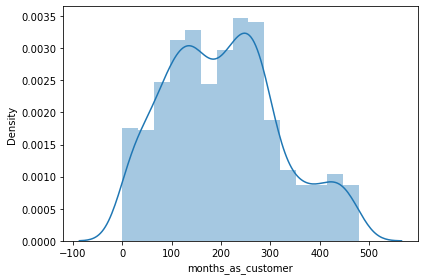

In [13]:
sns.distplot(data["months_as_customer"])
plt.xlabel("months_as_customer",fontsize=10)
plt.tight_layout()

# 
The data looks skewed, and will be dealt later

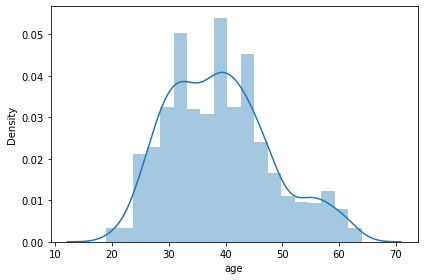

In [14]:
sns.distplot(data["age"])
plt.xlabel("age",fontsize=10)
plt.tight_layout()

# 
The data is slightly skewed

In [15]:
data['policy_bind_date']=pd.to_datetime(data['policy_bind_date'], dayfirst=True)

In [16]:
#Storing policy date, month and year in separate column
data['Policy_Date']=data['policy_bind_date'].dt.day
data['Policy_Month']=data['policy_bind_date'].dt.month
data['Policy_Year']=data['policy_bind_date'].dt.year

In [18]:
#As the policy date is stored in date, month year columns, policy date is deleted
data=data.drop(columns=["policy_bind_date"])

<AxesSubplot:ylabel='Frequency'>

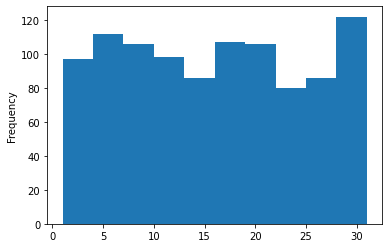

In [19]:
data.Policy_Date.plot(kind='hist')

# 
Majority of the policies have been dated on the 30 and 31st of the month

<AxesSubplot:ylabel='Frequency'>

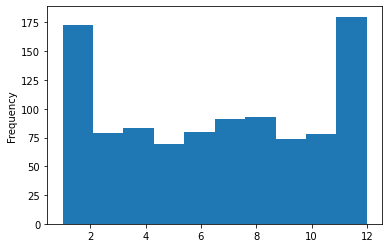

In [20]:
data.Policy_Month.plot(kind='hist')

# 
Majority of the policies are of January and December

<AxesSubplot:ylabel='Frequency'>

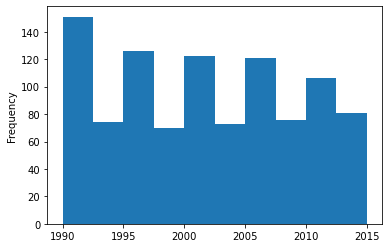

In [21]:
data.Policy_Year.plot(kind='hist')

# 
Majority of the policies are of 1990

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


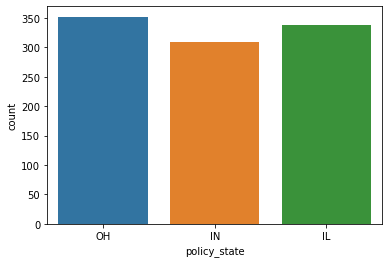

In [22]:
ax=sns.countplot(x="policy_state", data=data)
print(data["policy_state"].value_counts())

# 
352 are OH policy state, 338 are IL policy state and 310 are IN policy state   

In [23]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["policy_state"])
data["policy_state"]=df

# 
The data is encoded as follows-

- 0 - IL
- 1 - IN
- 2 - OH

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


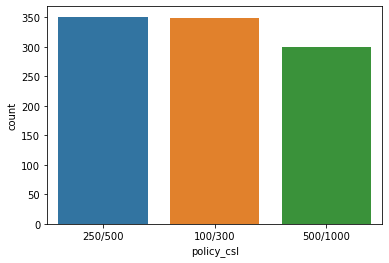

In [26]:
ax=sns.countplot(x="policy_csl", data=data)
print(data["policy_csl"].value_counts())

# 
351 have policy csl of 250/500, 349 have policy csl of 100/300 and 300 have policy csl of 500/1000

In [27]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["policy_csl"])
data["policy_csl"]=df

# 
The data is encoded as follows-

- 0 - 100/300
- 1 - 250/500
- 2 - 500/1000

1000    351
500     342
2000    307
Name: policy_deductable, dtype: int64


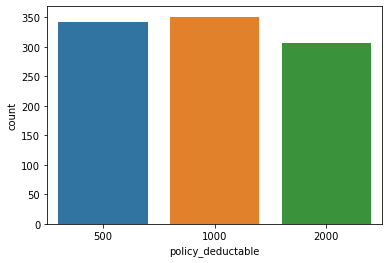

In [31]:
ax=sns.countplot(x="policy_deductable", data=data)
print(data["policy_deductable"].value_counts())

# 
351 policies have amount deductable of 1000, 342 policies have amount deductable of 500, 307 policies have amount deductable of 2000

In [32]:
#replacing categorical to simple number

data["policy_deductable"]=data["policy_deductable"].replace(500,0)
data["policy_deductable"]=data["policy_deductable"].replace(1000,1)
data["policy_deductable"]=data["policy_deductable"].replace(2000,2)

# 
The data is encoded as follows-

- 0 - 500
- 1 - 1000
- 2 - 2000

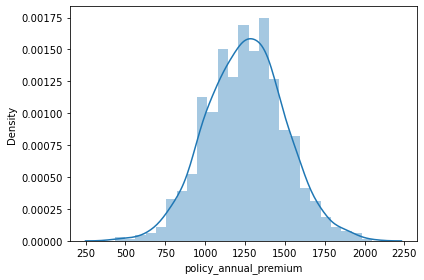

In [33]:
sns.distplot(data["policy_annual_premium"])
plt.xlabel("policy_annual_premium",fontsize=10)
plt.tight_layout()

# 
The data is fairly normally distributed

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

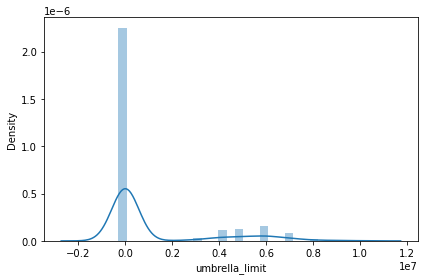

In [36]:
sns.distplot(data["umbrella_limit"])
plt.xlabel("umbrella_limit",fontsize=10)
plt.tight_layout()
data["umbrella_limit"].value_counts()

In [37]:
#Umbrella limit being negative is not possible
data["umbrella_limit"]=data["umbrella_limit"].replace(-1000000,1000000)

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


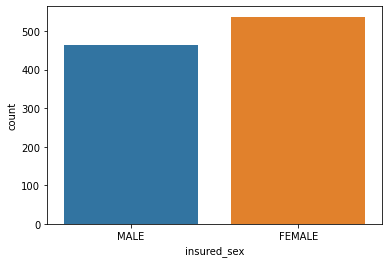

In [40]:
ax=sns.countplot(x="insured_sex", data=data)
print(data["insured_sex"].value_counts())

# 
There are 537 female clients and 463 female clients

In [41]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["insured_sex"])
data["insured_sex"]=df

# 
The data is encoded as follows-

- 0 - Female
- 1 - Male

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


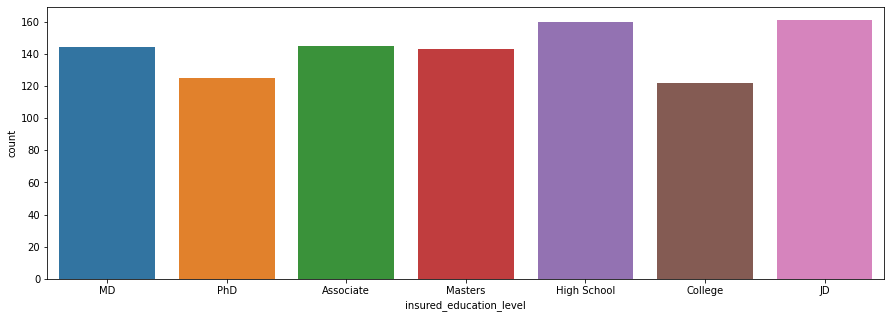

In [44]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x="insured_education_level", data=data)
print(data["insured_education_level"].value_counts())

# 
161 are JD (Juris Doctor), 160 are high school graduates, 145 are Associate degree holders, 144 are MD, 143 are Masters, 125 are PhD, 122 are College graduates

In [45]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["insured_education_level"])
data["insured_education_level"]=df

# 
The data is encoded as follows-

- 0 - Associate
- 1 - College
- 2 - High school
- 3 - JD
- 4 - MD
- 5 - Masters
- 6 - PhD

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


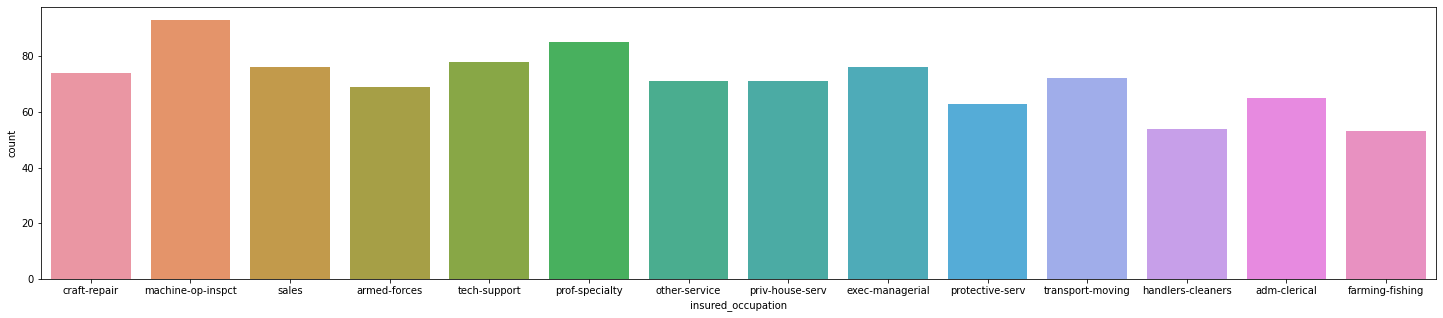

In [49]:
plt.figure(figsize=(25,5))
ax=sns.countplot(x="insured_occupation", data=data)
print(data["insured_occupation"].value_counts())

# 
93 are machine-op-inspct, 85 are prof-specialty, 78 are tech support, 76 are in sales, 76 are exec-managerial, 74 are craft-repair 72 are transport-moving, 71 other-service, 71 are priv-house-serv, 69 are armed-forces, 65 are adm-clerical ,  63 are protective-serv , 54 are handlers-cleaners, 53 are farming-fishing 


In [50]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["insured_occupation"])
data["insured_occupation"]=df

# 
The data is encoded as follows-

- 0 - adm-clerical
- 1 - armed-forces
- 2 - craft-repair
- 3 - exec-managerial
- 4 - farming-fishing
- 5 - handlers-cleaners
- 6 - machine-op-inspct
- 7 - other-service
- 8 - priv-house-serv
- 9 - prof-specialty
- 10- protective-serv
- 11- sales
- 12- tech support
- 13- transport-moving

reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


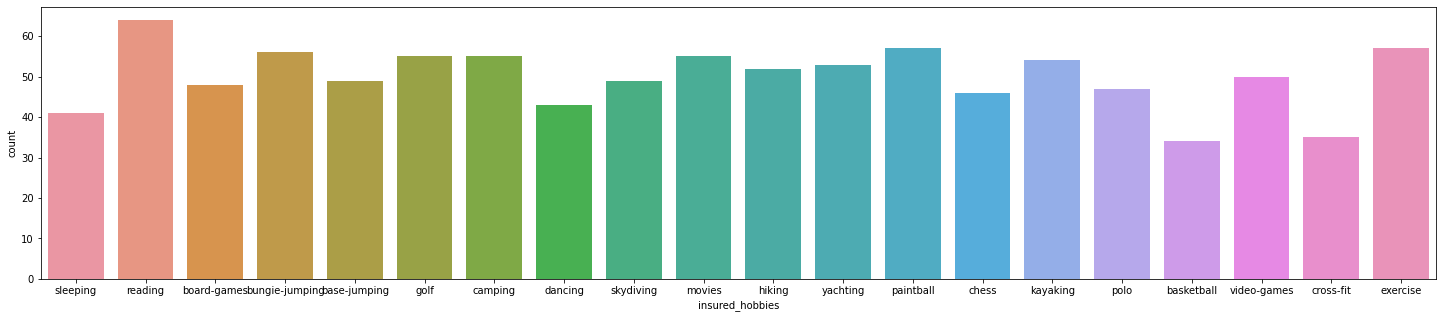

In [52]:
plt.figure(figsize=(25,5))
ax=sns.countplot(x="insured_hobbies", data=data)
print(data["insured_hobbies"].value_counts())

# 
64 enjoy reading, 57 enjoy exercise, 57 enjoy paintball, 56 enjoy bungie jumping, 55 enjoy movies, 55 enjoy golf, 55 enjoy camping54 enjoy kayaking, 53 enjoy yachting, 52 enjoy hiking, 50 enjoy video-games, 49 enjoy skydiving, 49 enjoy base-jumping, 48 enjoy board-games,  47 enjoy polo, 46 enjoy chess, 43 enjoy dancing, 41 enjoy sleeping, 35 enjoy cross fit, 34 enjoy basketball   

In [54]:
#Encoding the features using OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

data["insured_hobbies"]=enc.fit_transform(data["insured_hobbies"].values.reshape(-1,1))

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


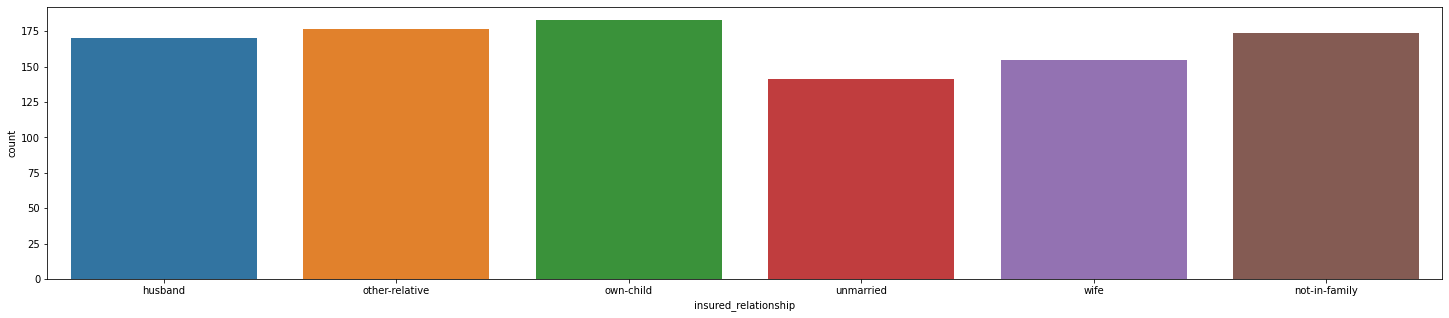

In [55]:
plt.figure(figsize=(25,5))
ax=sns.countplot(x="insured_relationship", data=data)
print(data["insured_relationship"].value_counts())

# 
183 are their own child, 177 are other-relative, 174 are not-in-family, 170 are their husband, 155 are their wife, 141 are unmarried   

In [56]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["insured_relationship"])
data["insured_relationship"]=df

# 

The data is encoded as follows-

- 0 - husband
- 1 - not-in-family
- 2 - other-relative
- 3 - own child
- 4 - unmarried
- 5 - wife

0        508
46300      5
51500      4
68500      4
55600      3
        ... 
36700      1
54900      1
69200      1
48800      1
50300      1
Name: capital-gains, Length: 338, dtype: int64

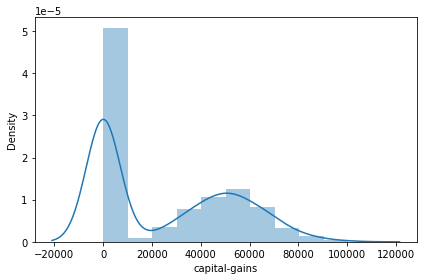

In [59]:
sns.distplot(data["capital-gains"])
plt.xlabel("capital-gains",fontsize=10)
plt.tight_layout()
data["capital-gains"].value_counts()

# 
The data is skewed, and will be dealt later

 0        475
-31700      5
-53700      5
-50300      5
-45300      4
         ... 
-12100      1
-17000      1
-72900      1
-19700      1
-82100      1
Name: capital-loss, Length: 354, dtype: int64

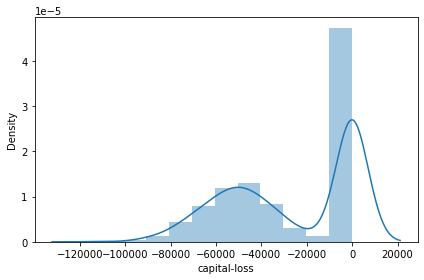

In [60]:
sns.distplot(data["capital-loss"])
plt.xlabel("capital-loss",fontsize=10)
plt.tight_layout()
data["capital-loss"].value_counts()

# 
The data is skewed, and will be dealt later

In [61]:
data['incident_date']=pd.to_datetime(data['incident_date'], dayfirst=True)

In [62]:
#Storing policy date, month and year in separate column
data['Incident_Date']=data['incident_date'].dt.day
data['Incident_Month']=data['incident_date'].dt.month
data['Incident_Year']=data['incident_date'].dt.year

In [64]:
#As the incident_date is stored in date, month year columns, policy date is deleted
data=data.drop(columns=["incident_date"])

<AxesSubplot:ylabel='Frequency'>

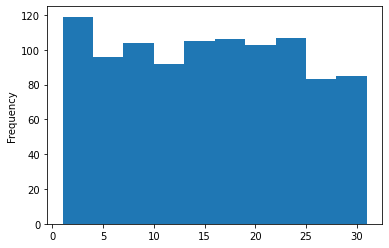

In [66]:
data.Incident_Date.plot(kind='hist')

# 
Majority of the incidents happen in the 1st week of the month

1    516
2    472
3     12
Name: Incident_Month, dtype: int64


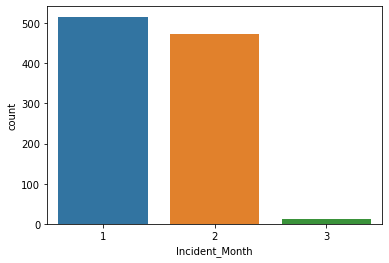

In [69]:
ax=sns.countplot(x="Incident_Month", data=data)
print(data["Incident_Month"].value_counts())

#
Majority of the incidents happen in January

2015    1000
Name: Incident_Year, dtype: int64


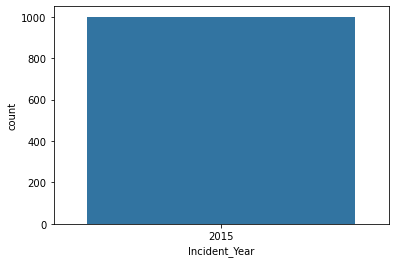

In [71]:
ax=sns.countplot(x="Incident_Year", data=data)
print(data["Incident_Year"].value_counts())

# 
All incidents are of the year 2015

In [72]:
#As all incidents are fo 2015, it is safe to delete he column
data=data.drop(columns=["Incident_Year"])

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


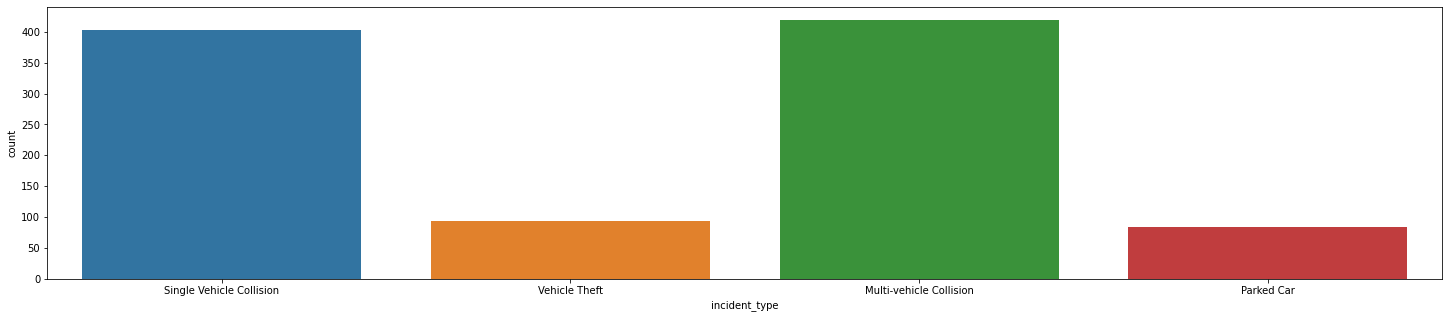

In [74]:
plt.figure(figsize=(25,5))
ax=sns.countplot(x="incident_type", data=data)
print(data["incident_type"].value_counts())

# 
419 are Multi-vehicle Collision, 403 are Single Vehicle Collision, 94 are Vehicle Theft, 84 are Parked Car   

In [75]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["incident_type"])
data["incident_type"]=df

# 
The data is encoded as follows-

- 0 - Multi-vehicle Collision
- 1 - Parked Car
- 2 - Single Vehicle Collision
- 3 - Vehicle Theft

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64


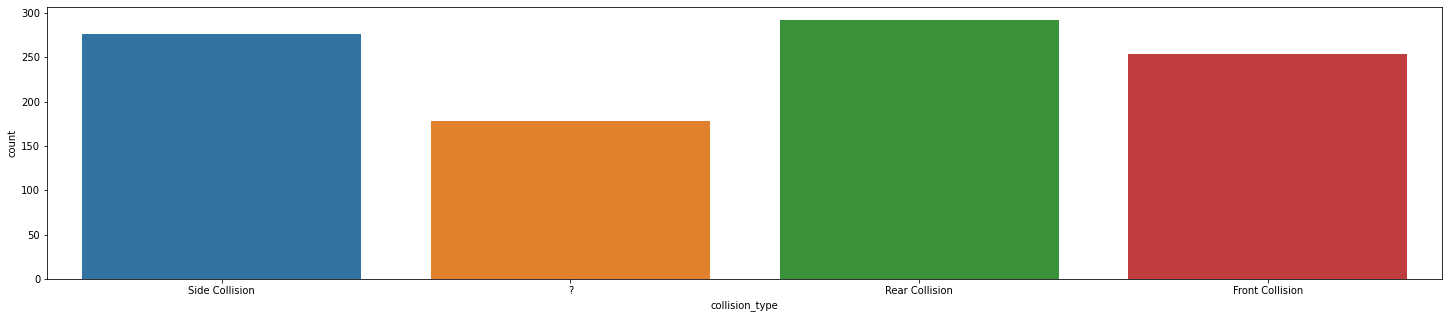

In [77]:
plt.figure(figsize=(25,5))
ax=sns.countplot(x="collision_type", data=data)
print(data["collision_type"].value_counts())

# 
292 are Rear Collision, 276 are Side Collision, 254 are Front Collision, 178 are Collision not applicable

In [78]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["collision_type"])
data["collision_type"]=df

# 
The data is encoded as follows-

- 0 - Collision not applicable
- 1 - Front Collision
- 2 - Rear Collision
- 3 - Side Collision

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


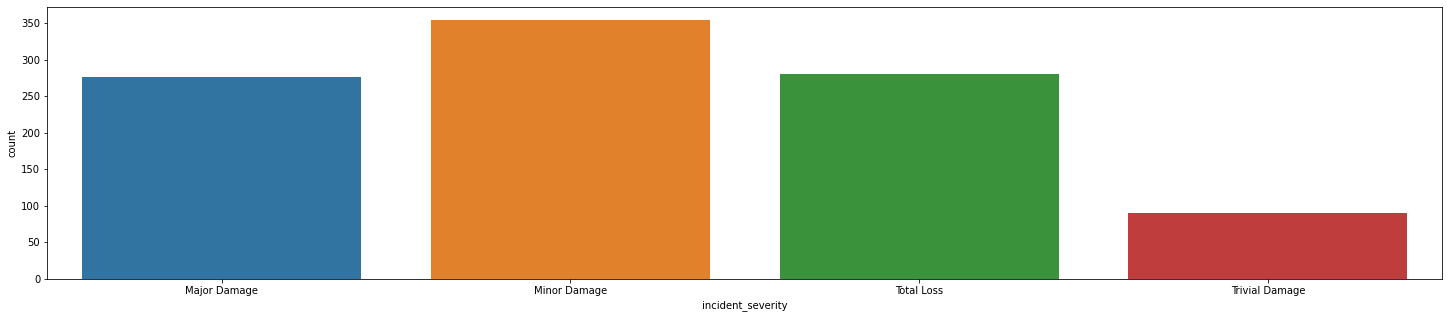

In [80]:
plt.figure(figsize=(25,5))
ax=sns.countplot(x="incident_severity", data=data)
print(data["incident_severity"].value_counts())

# 
354 has Minor Damage, 280 has Total Loss, 276 has Major Damage, 90 has Trivial Damage

In [81]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["incident_severity"])
data["incident_severity"]=df

# 
The data is encoded as follows-

- 0 - Major Damage
- 1 - Minor Damage
- 2 - Total Loss
- 3 - Trivial Damage

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


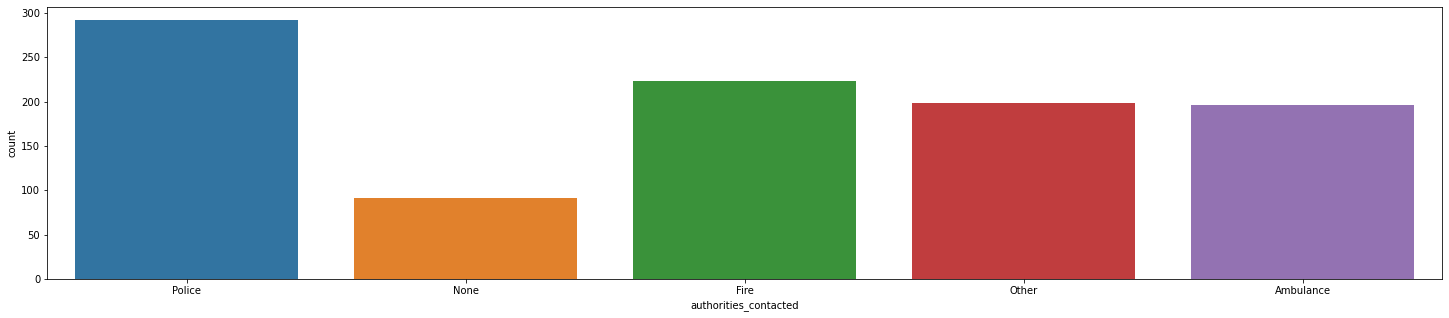

In [83]:
plt.figure(figsize=(25,5))
ax=sns.countplot(x="authorities_contacted", data=data)
print(data["authorities_contacted"].value_counts())

# 
292 contacted Police, 223 contacted Fire, 198 contacted Other, 196 contacted Ambulance and 91 contacted None

In [84]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["authorities_contacted"])
data["authorities_contacted"]=df

# 
The data is encoded as follows-

- 0 - Ambulance
- 1 - Fire
- 2 - None
- 3 - Other
- 4 - Police

NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64


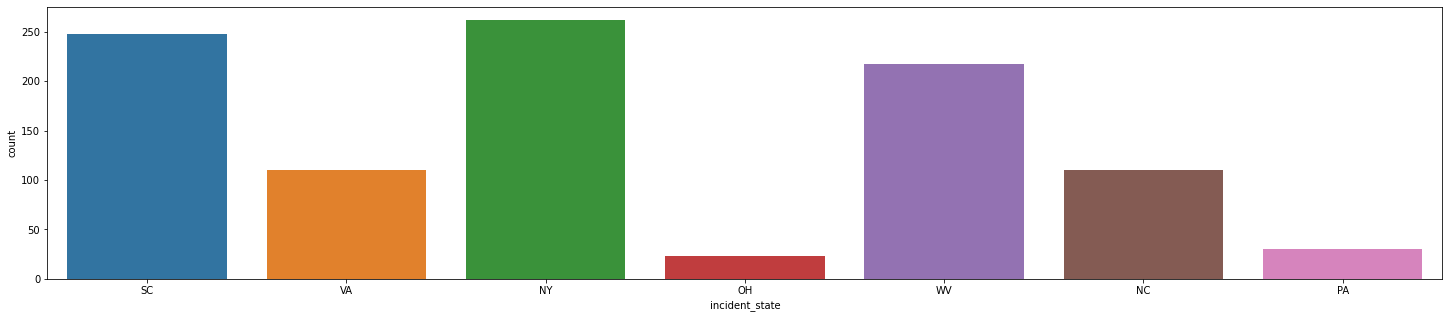

In [86]:
plt.figure(figsize=(25,5))
ax=sns.countplot(x="incident_state", data=data)
print(data["incident_state"].value_counts())

# 
262 incidents happened in NY, 248 incidents happened in SC, 217 incidents happened in WV, 110 incidents happened in VA, 110 incidents happened in NC, 30 incidents happened in PA, 23 incidents happened in OH

In [87]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["incident_state"])
data["incident_state"]=df

# 
The data is encoded as follows-

- 0 - NC
- 1 - NY
- 2 - OH
- 3 - PA
- 4 - SC
- 5 - VA
- 6 - WV

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


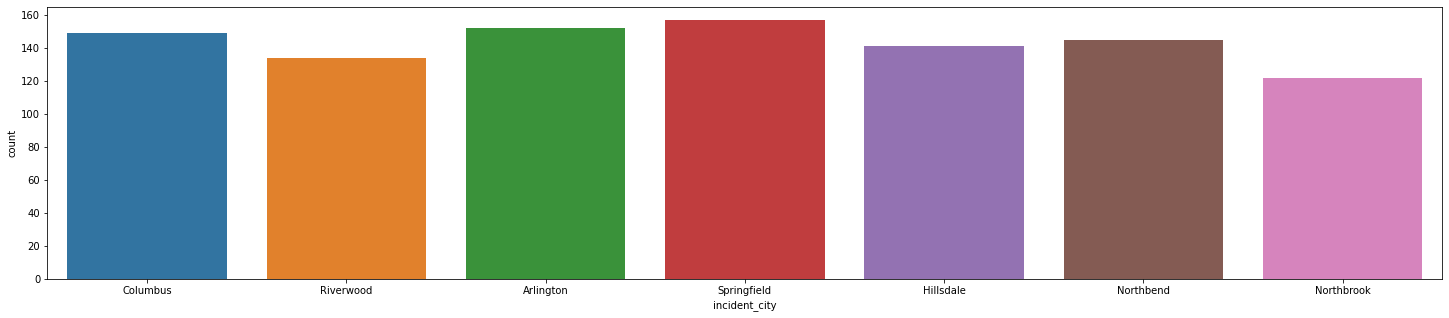

In [89]:
plt.figure(figsize=(25,5))
ax=sns.countplot(x="incident_city", data=data)
print(data["incident_city"].value_counts())

# 
157 incidents happened in Springfield, 152 incidents happened in Arlington, 149 incidents happened in Columbus, 145 incidents happened in Northbend , 141 incidents happened in Hillsdale , 134 incidents happened in Riverwood , 122 incidents happened in Northbrook 

In [90]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["incident_city"])
data["incident_city"]=df

# 
The data is encoded as follows-

- 0 - Arlington
- 1 - Columbus
- 2 - Hillsdale
- 3 - Northbend
- 4 - Northbrook
- 5 - Riverwood
- 6 - Springfield

<AxesSubplot:ylabel='Frequency'>

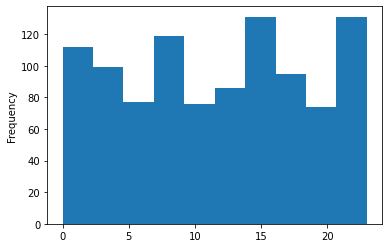

In [92]:
data.incident_hour_of_the_day.plot(kind='hist')

# 
Majority of incidents happen late at night or at 3.00pm

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64


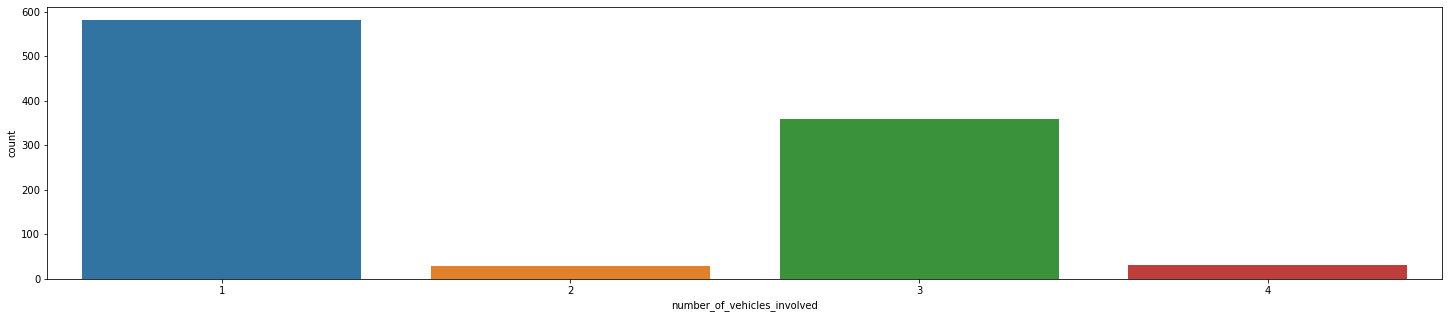

In [93]:
plt.figure(figsize=(25,5))
ax=sns.countplot(x="number_of_vehicles_involved", data=data)
print(data["number_of_vehicles_involved"].value_counts())

# 
581 incidents involved 1 vehicle, 358 incidents involved 3 vehicles, 31 incidents involved 4 vehicles, 30 incidents involved 2 vehicles
  

?      360
NO     338
YES    302
Name: property_damage, dtype: int64


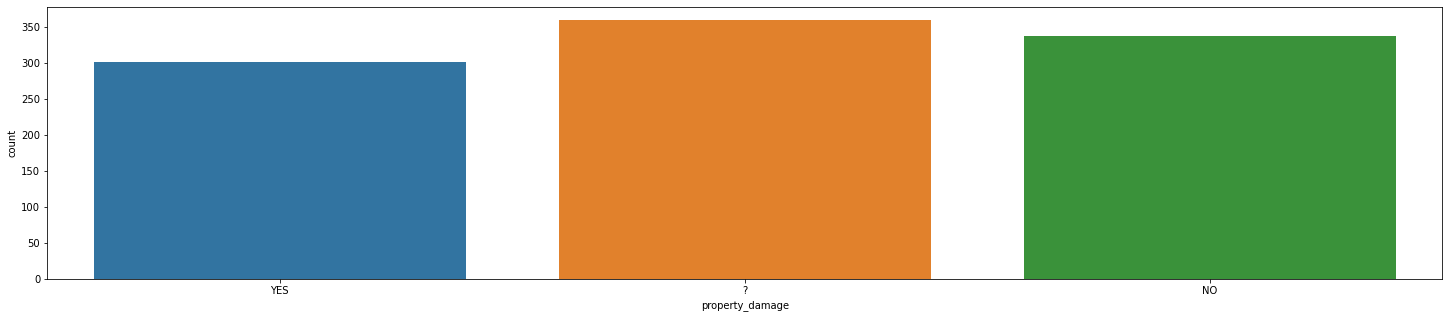

In [94]:
plt.figure(figsize=(25,5))
ax=sns.countplot(x="property_damage", data=data)
print(data["property_damage"].value_counts())

# 
In 360 incidents property damage is not known, 338 have no property damage, 302 have property damage

In [95]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["property_damage"])
data["property_damage"]=df

# 
The data is encoded as follows-

- 0 - Not known
- 1 - No
- 2 - Yes

In [108]:
#Replacing not known with thw mode of the column
data["property_damage"]=data["property_damage"].replace(0,np.nan)
data["property_damage"]=data["property_damage"].fillna(data["property_damage"].mode()[0])

1.0    698
2.0    302
Name: property_damage, dtype: int64


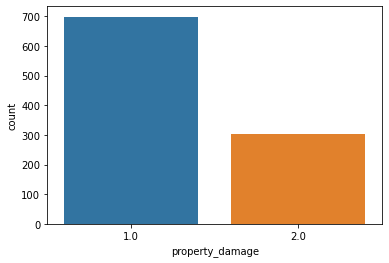

In [109]:
ax=sns.countplot(x="property_damage", data=data)
print(data["property_damage"].value_counts())

#
In 698 incidents there is no property damage, 302 have property damage

0    340
2    332
1    328
Name: bodily_injuries, dtype: int64


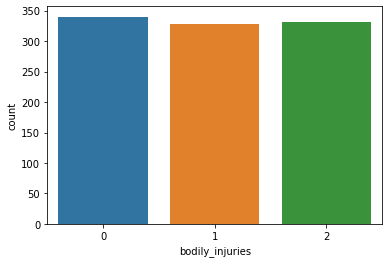

In [99]:
ax=sns.countplot(x="bodily_injuries", data=data)
print(data["bodily_injuries"].value_counts())

# 
340 have 0 bodily injuries, 332 have 2 bodily injuries,328 have 1 bodily injury

1    258
2    250
0    249
3    243
Name: witnesses, dtype: int64


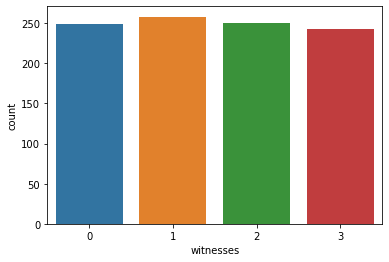

In [100]:
ax=sns.countplot(x="witnesses", data=data)
print(data["witnesses"].value_counts())

# 
258 have 1 witness, 250 have 2 witnesses, 249 have 0 witness, 243 have 3 witnesses

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64


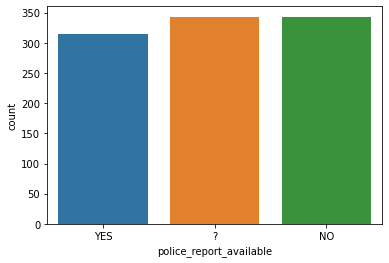

In [101]:
ax=sns.countplot(x="police_report_available", data=data)
print(data["police_report_available"].value_counts())

# 
343 incidents have no data if police report is available, 343 incidents do not have police reports, 314 incidents have police reports
  

In [102]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["police_report_available"])
data["police_report_available"]=df

# 
The data is encoded as follows-

- 0 - Not known
- 1 - No
- 2 - Yes

In [110]:
#Replacing not known with thw mode of the column
data["police_report_available"]=data["police_report_available"].replace(0,np.nan)
data["police_report_available"]=data["police_report_available"].fillna(data["police_report_available"].mode()[0])

1.0    686
2.0    314
Name: police_report_available, dtype: int64


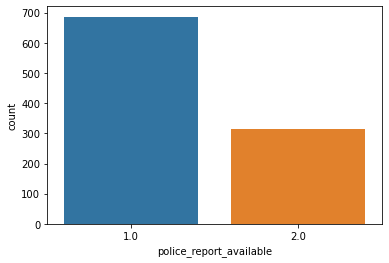

In [111]:
ax=sns.countplot(x="police_report_available", data=data)
print(data["police_report_available"].value_counts())

# 
686 incidents do not have police reports, 314 incidents have police reports

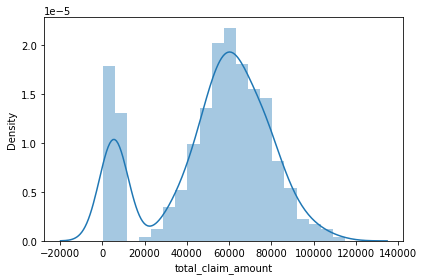

In [113]:
sns.distplot(data["total_claim_amount"])
plt.xlabel("total_claim_amount",fontsize=10)
plt.tight_layout()

# 
The data is skewed, and will be handled later

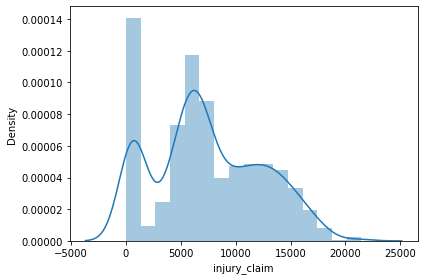

In [122]:
sns.distplot(data["injury_claim"])
plt.xlabel("injury_claim",fontsize=10)
plt.tight_layout()

# 
The data is skewed, and will be handled later

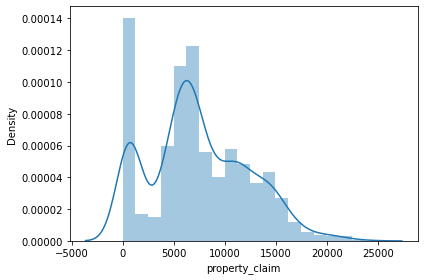

In [123]:
sns.distplot(data["property_claim"])
plt.xlabel("property_claim",fontsize=10)
plt.tight_layout()

# 
The data is skewed, and will be handled later

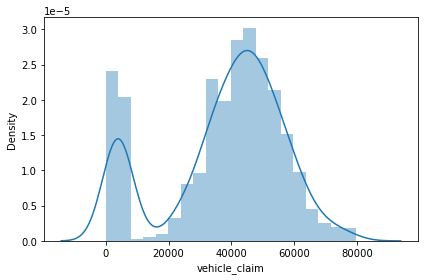

In [124]:
sns.distplot(data["vehicle_claim"])
plt.xlabel("vehicle_claim",fontsize=10)
plt.tight_layout()

# 
The data is skewed, and will be handled later

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


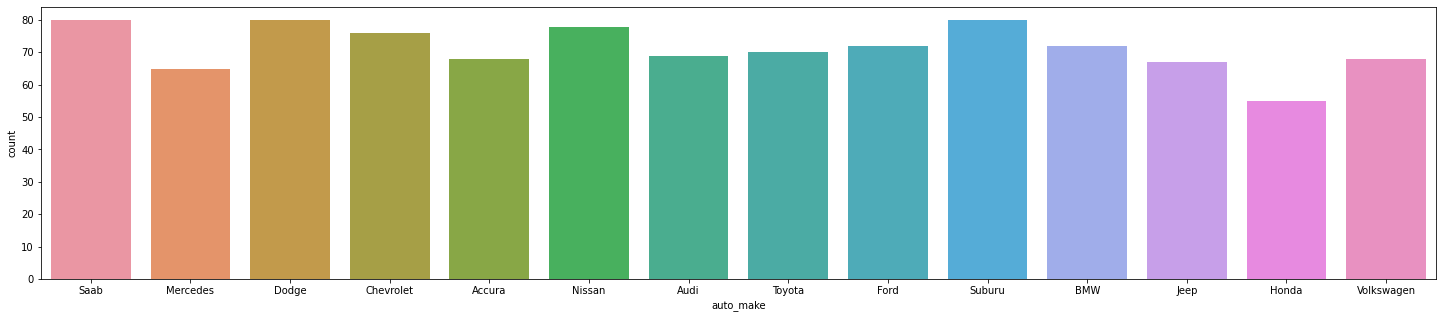

In [126]:
plt.figure(figsize=(25,5))
ax=sns.countplot(x="auto_make", data=data)
print(data["auto_make"].value_counts())

# 
80 vehicles are of Saab, 80 vehicles are of Dodge, 80 vehicles are of Suburu, 78 vehicles are of Nissan, 76 vehicles are of Chevrolet, 72 vehicles are of Ford, 72 vehicles are of BMW, 70 vehicles are of Toyota, 69 vehicles are of Audi, 68 vehicles are of Accura, 68 vehicles are of Volkswagen, 67 vehicles are of Jeep, 65 vehicles are of Mercedes, 55 vehicles are of Honda

In [128]:
#Encoding the features using OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
data["auto_make"]=enc.fit_transform(data["auto_make"].values.reshape(-1,1))

RAM               43
Wrangler          42
A3                37
Neon              37
MDX               36
Jetta             35
Passat            33
A5                32
Legacy            32
Pathfinder        31
Malibu            30
92x               28
Camry             28
Forrestor         28
F150              27
95                27
E400              27
93                25
Grand Cherokee    25
Escape            24
Tahoe             24
Maxima            24
Ultima            23
X5                23
Highlander        22
Civic             22
Silverado         22
Fusion            21
ML350             20
Impreza           20
Corolla           20
TL                20
CRV               20
C300              18
3 Series          18
X6                16
M5                15
Accord            13
RSX               12
Name: auto_model, dtype: int64


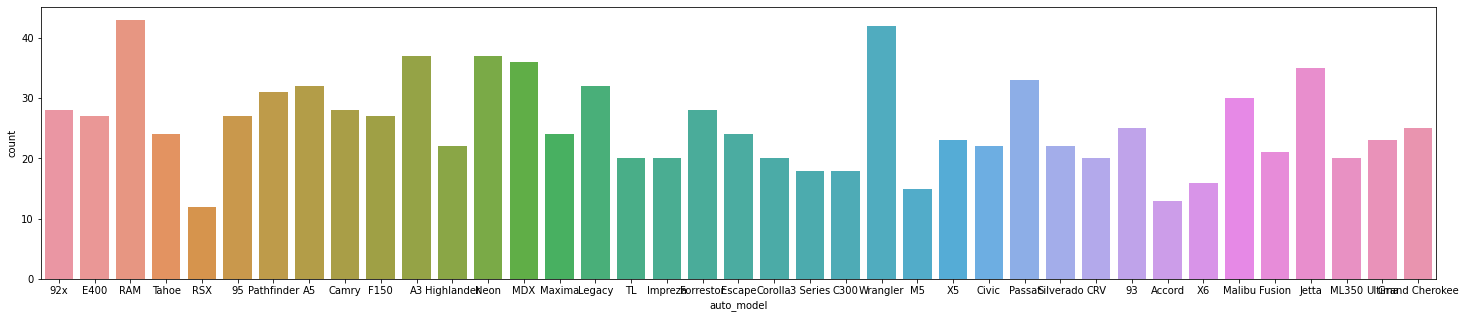

In [129]:
plt.figure(figsize=(25,5))
ax=sns.countplot(x="auto_model", data=data)
print(data["auto_model"].value_counts())

In [130]:
#Encoding the features using OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
data["auto_model"]=enc.fit_transform(data["auto_model"].values.reshape(-1,1))

1995    56
1999    55
2005    54
2006    53
2011    53
2007    52
2003    51
2009    50
2010    50
2013    49
2002    49
2015    47
1997    46
2012    46
2008    45
2014    44
2001    42
2000    42
1998    40
2004    39
1996    37
Name: auto_year, dtype: int64


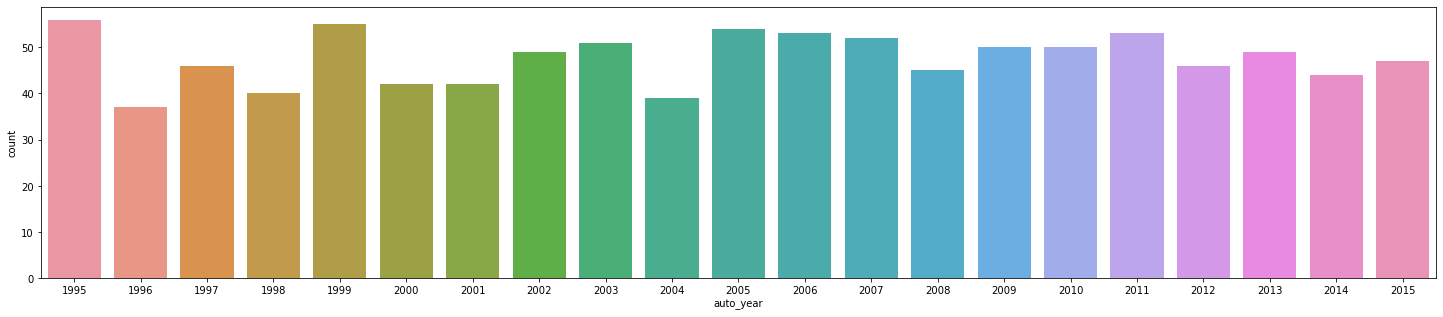

In [132]:
plt.figure(figsize=(25,5))
ax=sns.countplot(x="auto_year", data=data)
print(data["auto_year"].value_counts())

N    753
Y    247
Name: fraud_reported, dtype: int64


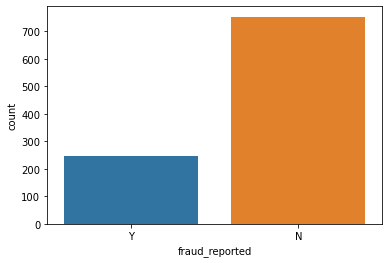

In [134]:
ax=sns.countplot(x="fraud_reported", data=data)
print(data["fraud_reported"].value_counts())

# 
In 753 incidents it was not a fraud, In 247 it was a fraud

In [135]:
#Encoding string into numeric data by alphabetical order

from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()
df=enc.fit_transform(data["fraud_reported"])
data["fraud_reported"]=df

# 
The data is encoded as follows-
- 0- No
- 1- Yes

In [137]:
# Checking for data types of the columns
data.dtypes

months_as_customer               int64
age                              int64
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                float64
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                float64
bodily_injuries                  int64
witnesses                        int64
police_report_available  

# 
All the data is converted into numeric form

In [138]:
#Statistical Analysis
data.describe()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Policy_Date,Policy_Month,Policy_Year,Incident_Date,Incident_Month
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1.01400,0.951000,0.965000,1256.406150,1.103000e+06,0.463000,2.966000,6.653000,...,37928.950000,6.546000,19.318000,2005.103000,0.247000,15.448000,6.559000,2001.604000,14.995000,1.496000
std,115.113174,9.140287,0.83096,0.804516,0.805247,244.167395,2.296446e+06,0.498879,1.948497,4.019048,...,18886.252893,4.034869,11.136107,6.015861,0.431483,8.808001,3.499824,7.360391,8.670995,0.523697
min,0.000000,19.000000,0.00000,0.000000,0.000000,433.330000,0.000000e+00,0.000000,0.000000,0.000000,...,70.000000,0.000000,0.000000,1995.000000,0.000000,1.000000,1.000000,1990.000000,1.000000,1.000000
25%,115.750000,32.000000,0.00000,0.000000,0.000000,1089.607500,0.000000e+00,0.000000,1.000000,3.000000,...,30292.500000,3.000000,10.000000,2000.000000,0.000000,8.000000,3.000000,1995.000000,7.750000,1.000000
50%,199.500000,38.000000,1.00000,1.000000,1.000000,1257.200000,0.000000e+00,0.000000,3.000000,7.000000,...,42100.000000,7.000000,20.000000,2005.000000,0.000000,16.000000,7.000000,2002.000000,15.000000,1.000000
75%,276.250000,44.000000,2.00000,2.000000,2.000000,1415.695000,0.000000e+00,1.000000,5.000000,10.000000,...,50822.500000,10.000000,29.000000,2010.000000,0.000000,23.000000,10.000000,2008.000000,22.000000,2.000000
max,479.000000,64.000000,2.00000,2.000000,2.000000,2047.590000,1.000000e+07,1.000000,6.000000,13.000000,...,79560.000000,13.000000,38.000000,2015.000000,1.000000,31.000000,12.000000,2015.000000,31.000000,3.000000


# Checking Correlation

In [139]:
data.corr()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Policy_Date,Policy_Month,Policy_Year,Incident_Date,Incident_Month
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.018481,0.005018,0.016111,0.060925,-0.000833,0.009814,...,0.061013,0.047655,0.004202,-0.000292,0.020544,0.054809,-0.001559,-0.048276,-0.001455,-0.042826
age,0.922098,1.000000,-0.014533,-0.015185,0.020561,0.014404,0.018425,0.073337,0.000969,0.017220,...,0.062588,0.030410,0.017343,0.001354,0.012143,0.056776,0.008357,-0.037444,0.003697,-0.037058
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.008213,0.012455,-0.028558,-0.020481,-0.034327,-0.031215,...,0.001425,0.017124,-0.025253,0.002114,0.029432,0.011178,0.046871,-0.007276,0.025572,0.018531
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.001986,0.023978,0.020614,-0.010757,0.009153,0.015788,...,-0.046791,-0.004701,0.047885,-0.033082,-0.037190,0.010164,-0.021547,-0.016466,-0.007640,-0.030164
policy_deductable,0.018481,0.020561,0.008213,0.001986,1.000000,0.001624,0.005741,-0.011948,0.012000,-0.053245,...,0.000502,-0.030775,-0.003892,0.024921,0.007620,-0.015852,-0.020045,-0.051826,-0.026260,-0.027630
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,0.001624,1.000000,-0.005956,0.038853,-0.019715,0.035922,...,0.020246,0.000045,-0.031849,-0.049226,-0.014480,-0.037933,-0.002480,0.001249,0.028797,-0.046097
umbrella_limit,0.016111,0.018425,-0.028558,0.020614,0.005741,-0.005956,1.000000,0.011630,-0.020692,0.023290,...,-0.037190,-0.005211,0.040717,0.008578,0.058147,-0.024504,-0.046279,0.047246,-0.008570,-0.003403
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.011948,0.038853,0.011630,1.000000,0.009002,-0.006160,...,-0.029609,0.026457,-0.018421,-0.028247,0.030873,0.039769,-0.001042,-0.032891,0.001924,-0.025471
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.012000,-0.019715,-0.020692,0.009002,1.000000,-0.020298,...,0.068348,0.055202,0.049445,0.043509,0.008808,0.042708,-0.082494,0.018952,-0.038402,-0.053106
insured_occupation,0.009814,0.017220,-0.031215,0.015788,-0.053245,0.035922,0.023290,-0.006160,-0.020298,1.000000,...,-0.000829,0.042621,0.020584,-0.006676,0.001564,0.007930,-0.010890,-0.027085,-0.018720,-0.009459


# 
For better understanding let's use a heat map

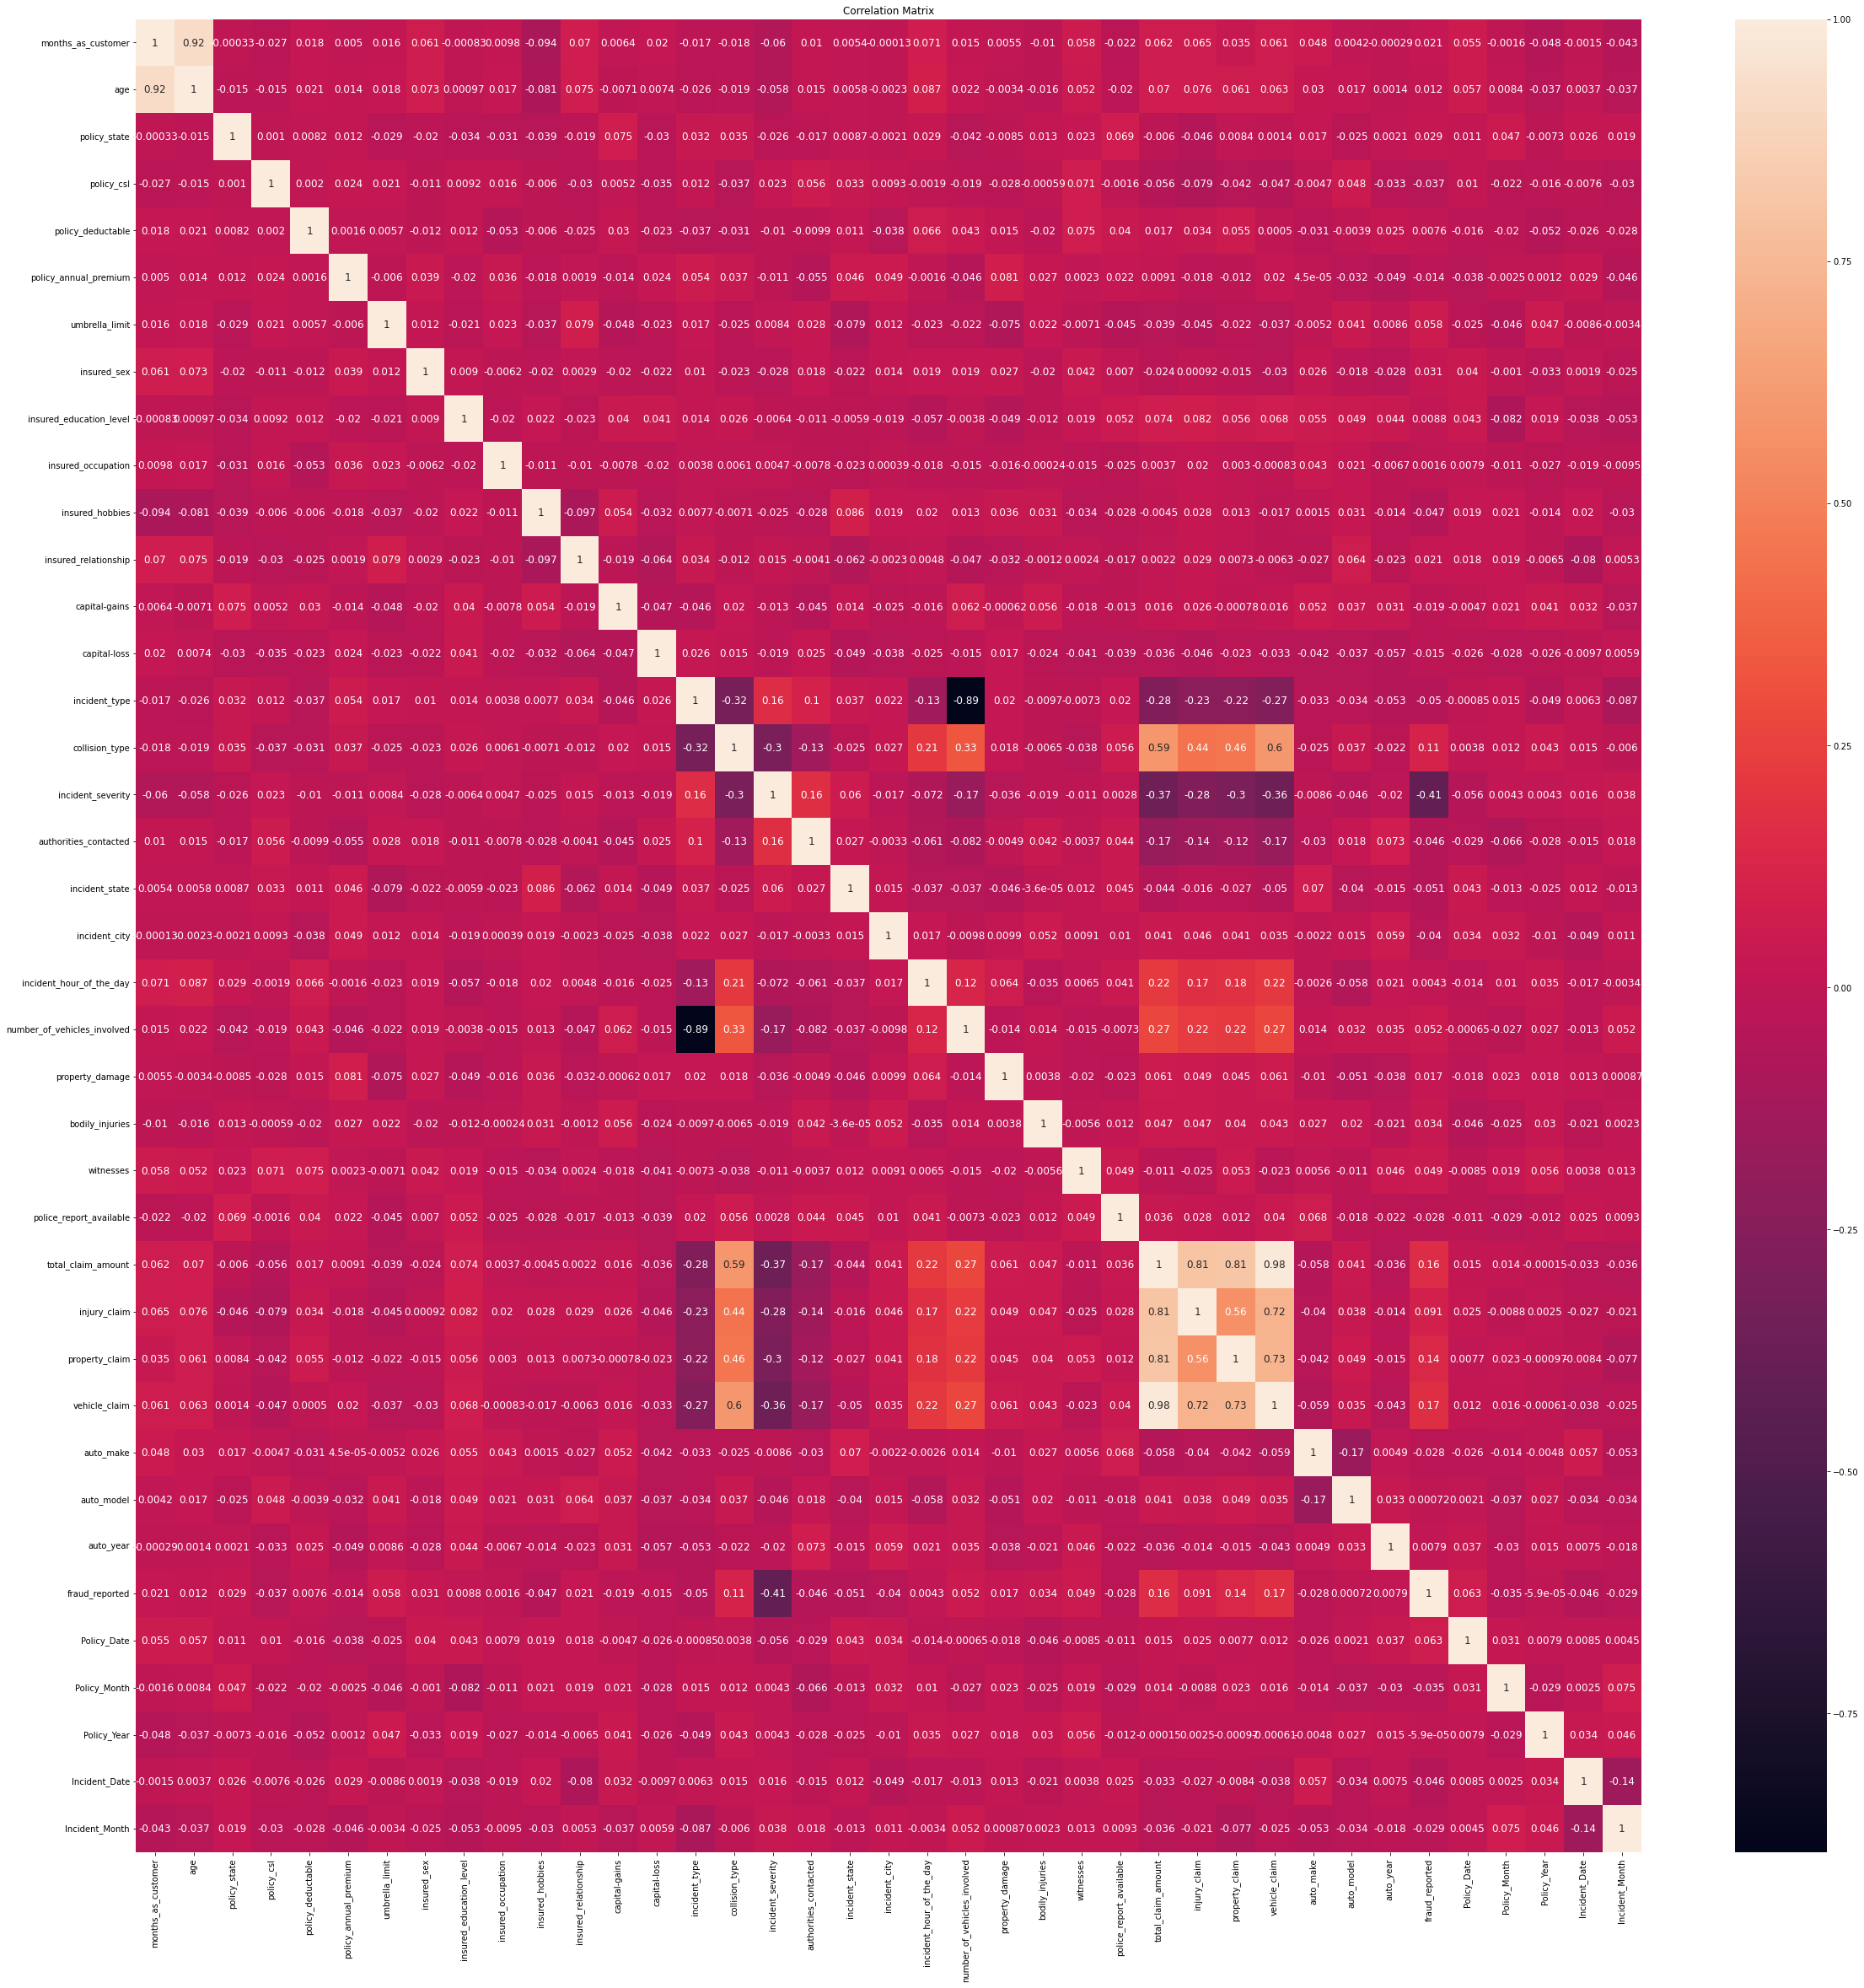

In [142]:
corr_mat=data.corr()

#size of the canvas
plt.figure(figsize=[40,40])

#plot the correlation matrix
sns.heatmap(corr_mat,annot=True, annot_kws={'size':12})
plt.title("Correlation Matrix")
plt.show()

# Observation-

# 
Let's print the correlation values of independent values with target variable for a better understanding

In [143]:
#Let's print the correlation coefficient for the Prediction with churn

corr_matrix=data.corr()
corr_matrix["fraud_reported"].sort_values(ascending=True)

incident_severity             -0.405988
incident_state                -0.051407
incident_type                 -0.050376
insured_hobbies               -0.046838
Incident_Date                 -0.045955
authorities_contacted         -0.045802
incident_city                 -0.040403
policy_csl                    -0.037190
Policy_Month                  -0.035180
Incident_Month                -0.028847
police_report_available       -0.027768
auto_make                     -0.027519
capital-gains                 -0.019173
capital-loss                  -0.014863
policy_annual_premium         -0.014480
Policy_Year                   -0.000059
auto_model                     0.000720
insured_occupation             0.001564
incident_hour_of_the_day       0.004316
policy_deductable              0.007620
auto_year                      0.007928
insured_education_level        0.008808
age                            0.012143
property_damage                0.017202
months_as_customer             0.020544


# Observation-
- incident_severity, incident_state, incident_type, insured_hobbies, Incident_Date, authorities_contacted, incident_city, policy_csl, Policy_Month, Incident_Month, police_report_available, auto_make, capital-gains, capital-loss, policy_annual_premium and Policy_Year are negatively correlated to the label fraud_reported
- auto_model, insured_occupation, incident_hour_of_the_day, policy_deductable, auto_year, insured_education_level, age, property_damage, months_as_customer, insured_relationship, policy_state, insured_sex, bodily_injuries, witnesses, number_of_vehicles_involved, umbrella_limit, Policy_Date, injury_claim, collision_type, property_claim, total_claim_amount and vehicle_claim are positively correlated to the label fraud_reported
- incident_severity are 40% negatively correlated to the label fraud_reported showing a moderately weak bond
- Policy_Year is 0.05% negatively correlated with churn showing an extremely weak bond
- auto_model is 0.7% positively correlated with fraud_reported showing an extremely weak bond
- vehicle_claim is 17% positively correlated with fraud_reported showing an moderately weak bond

In [144]:
data.shape

(1000, 39)

# Checking for outliers

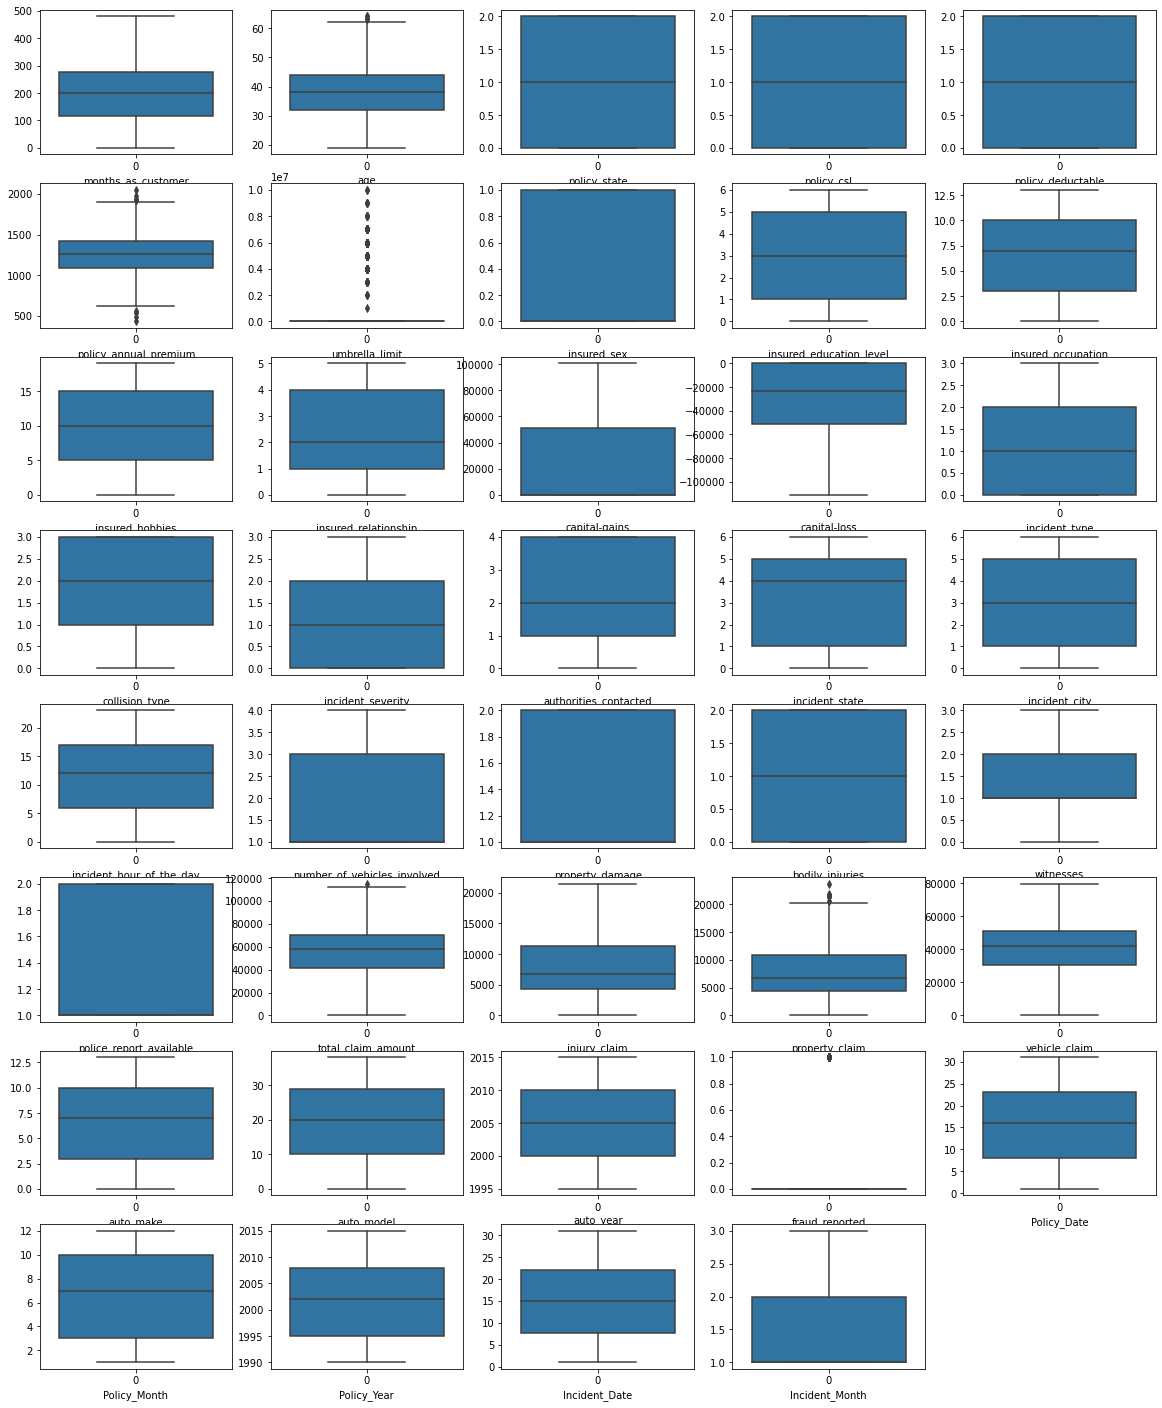

In [151]:
#visulaize the outliers using boxplot
plt.figure(figsize=(20,25))
graph=1

for column in data:
    if graph<=40:
        ax=plt.subplot(8,5,graph)
        sns.boxplot(data=data[column], orient='v')
        plt.xlabel(column,fontsize=10)
    graph=graph+1
plt.show()

# 
The features containing outliers-

- age
- policy_annual_premium
- umbrella limit
- total_claim amount
- proprty claim

In [152]:
#remove outliers using zscore technique
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
z.shape

(1000, 39)

In [153]:
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 6,  6,  6,  6,  6,  5,  5,  6,  6,  6,  6, 28,  6,  6,  6,  5, 13,
        6,  6,  6], dtype=int64))


In [154]:
data_new=data[(z<3).all(axis=1)]
print(data.shape)
print(data_new.shape)

(1000, 39)
(980, 39)


In [155]:
Dataloss= ((1000-980)/1000)*100
Dataloss

2.0

# 
As data loss is 2%, outliers are being removed

# Divide Data Set into features and labels

In [156]:
y=data_new['fraud_reported']
x=data_new.drop(columns=['fraud_reported'])

In [159]:
# Confirming the skewness
x.skew().sort_values(ascending=False)

umbrella_limit                 1.801818
property_damage                0.853093
police_report_available        0.796221
number_of_vehicles_involved    0.509725
age                            0.475385
capital-gains                  0.466619
months_as_customer             0.362608
property_claim                 0.361356
incident_severity              0.277726
injury_claim                   0.271759
Incident_Month                 0.259907
insured_sex                    0.139324
policy_csl                     0.098248
incident_type                  0.090563
insured_relationship           0.078339
Policy_Year                    0.065022
policy_deductable              0.059141
Policy_Date                    0.054173
incident_city                  0.043882
Incident_Date                  0.037814
policy_annual_premium          0.035964
witnesses                      0.026211
insured_education_level        0.006286
bodily_injuries                0.003757
auto_make                     -0.028739


# 
Keeping +/-0.5 as the range of skewness, the columns not falling in this range are-

- umbrella_limit   
- property_damage      
- police_report_available           
- vehicle_claim            

# Transforming Data to remove skewness

In [160]:
from sklearn.preprocessing import power_transform
x_n=power_transform(x)

In [162]:
#Checking if skewness was rectified
x_skew=pd.DataFrame(x_n, columns=x.columns)
x_skew.skew().sort_values(ascending=False)

umbrella_limit                 1.576091
property_damage                0.853093
police_report_available        0.796221
number_of_vehicles_involved    0.372833
insured_sex                    0.139324
Incident_Month                 0.105409
capital-loss                   0.088750
Policy_Year                    0.045199
capital-gains                  0.031294
age                           -0.002183
policy_annual_premium         -0.007258
auto_year                     -0.013973
incident_severity             -0.079569
incident_type                 -0.095572
policy_csl                    -0.096814
policy_deductable             -0.112991
bodily_injuries               -0.133824
months_as_customer            -0.133972
policy_state                  -0.150765
witnesses                     -0.151669
insured_relationship          -0.160168
Policy_Month                  -0.180319
incident_city                 -0.181833
insured_education_level       -0.187642
Policy_Date                   -0.198057


# Scaling the data

In [163]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x_skew)

# 
As there are too many features not having significant correlation with the label, PCA is applied

# Applying PCA (Principal Component Analysis)

In [165]:
from sklearn.decomposition import PCA

In [166]:
pca=PCA()
pca.fit_transform(X_scaled)

array([[-1.26225836e+00, -1.29258510e+00,  1.47939205e+00, ...,
         2.33271174e-04,  9.86119930e-02,  4.44584413e-04],
       [ 4.03902094e+00, -9.60774107e-01,  2.86657440e-01, ...,
         8.68026496e-02, -3.99192005e-01,  1.97440271e-02],
       [ 3.72031812e-01,  1.23787279e+00, -1.72538651e+00, ...,
        -4.46374931e-01, -9.27257564e-02, -4.47182136e-02],
       ...,
       [-1.39235577e+00,  8.23096219e-01, -8.44177073e-01, ...,
         2.47164730e-01, -3.01528403e-02, -1.28015198e-02],
       [ 6.11115548e-01, -3.12633922e+00,  5.67568766e-01, ...,
         1.17507144e-01,  1.30498414e-03, -4.17619641e-02],
       [ 3.85300664e+00, -2.51672146e+00, -1.53981928e+00, ...,
         9.34981861e-02,  4.65690284e-01,  7.56653018e-03]])

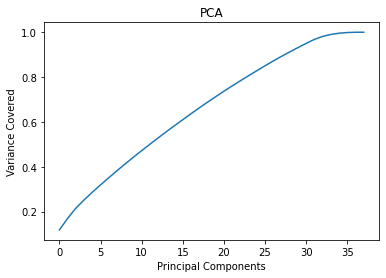

In [168]:
#Lets plot Scree plot to check the best components
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

# 
Around 30 principal components are able to explain >95% variance. 

In [169]:
pca=PCA(n_components=30)

In [170]:
new_pcomp=pca.fit_transform(X_scaled)

In [171]:
princi_comp=pd.DataFrame(new_pcomp, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30'])

# Using Logistic Regression Model

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [173]:
maxAccu=0     #maximum accuracy
maxRS=0       #best random state

#Finding Best random state
for i in range(0,200):
    x_train, x_test, y_train, y_test= train_test_split(princi_comp, y, test_size=0.2, random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train, y_train)                #fitting the data will train the model
    predrf=LR.predict(x_test)               #this is the predicted target variable
    acc=accuracy_score(y_test, predrf)      #accuracy score
    print('accuracy', acc, 'random_state', i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('accuracy', maxAccu, 'random_state', i)

accuracy 0.7448979591836735 random_state 0
accuracy 0.7448979591836735 random_state 0
accuracy 0.7857142857142857 random_state 1
accuracy 0.7857142857142857 random_state 1
accuracy 0.7346938775510204 random_state 2
accuracy 0.7857142857142857 random_state 3
accuracy 0.7908163265306123 random_state 4
accuracy 0.7908163265306123 random_state 4
accuracy 0.7653061224489796 random_state 5
accuracy 0.8010204081632653 random_state 6
accuracy 0.8010204081632653 random_state 6
accuracy 0.7857142857142857 random_state 7
accuracy 0.7755102040816326 random_state 8
accuracy 0.8010204081632653 random_state 9
accuracy 0.8214285714285714 random_state 10
accuracy 0.8214285714285714 random_state 10
accuracy 0.8163265306122449 random_state 11
accuracy 0.7551020408163265 random_state 12
accuracy 0.75 random_state 13
accuracy 0.7551020408163265 random_state 14
accuracy 0.7704081632653061 random_state 15
accuracy 0.7551020408163265 random_state 16
accuracy 0.7346938775510204 random_state 17
accuracy 0.80102

In [174]:
#creating train-test-sloit using best random state observed(i.e.130)
x_train, x_test, y_train, y_test= train_test_split(princi_comp, y, test_size=0.2, random_state=130)

In [175]:
LR=LogisticRegression()
LR.fit(x_train, y_train)                
predlr=LR.predict(x_test)               
print("Accuracy ",accuracy_score(y_test, predlr)*100)      #accuracy score
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy  82.6530612244898
[[143  14]
 [ 20  19]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       157
           1       0.58      0.49      0.53        39

    accuracy                           0.83       196
   macro avg       0.73      0.70      0.71       196
weighted avg       0.82      0.83      0.82       196



# Using KNeighbors Classifier Model

In [176]:
from sklearn.neighbors import KNeighborsClassifier

kn=KNeighborsClassifier()
kn.fit(x_train, y_train)
predkn=kn.predict(x_test)
print("Accuracy ",accuracy_score(y_test, predkn)*100)      #accuracy score
print(confusion_matrix(y_test,predkn))
print(classification_report(y_test,predkn))

Accuracy  72.44897959183673
[[136  21]
 [ 33   6]]
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       157
           1       0.22      0.15      0.18        39

    accuracy                           0.72       196
   macro avg       0.51      0.51      0.51       196
weighted avg       0.69      0.72      0.70       196



# Using Decision Tree Classifier

In [177]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt=dt.predict(x_test)
print("Accuracy ",accuracy_score(y_test, preddt)*100)      #accuracy score
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy  66.3265306122449
[[115  42]
 [ 24  15]]
              precision    recall  f1-score   support

           0       0.83      0.73      0.78       157
           1       0.26      0.38      0.31        39

    accuracy                           0.66       196
   macro avg       0.55      0.56      0.54       196
weighted avg       0.72      0.66      0.68       196



# Using Random Forest Classifier

In [178]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train, y_train)
predrf=rf.predict(x_test)
print("Accuracy ",accuracy_score(y_test, predrf)*100)      #accuracy score
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy  81.63265306122449
[[156   1]
 [ 35   4]]
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       157
           1       0.80      0.10      0.18        39

    accuracy                           0.82       196
   macro avg       0.81      0.55      0.54       196
weighted avg       0.81      0.82      0.75       196



# Using AdaBoost Classifier

In [179]:
from sklearn.ensemble import AdaBoostClassifier

ada=AdaBoostClassifier()
ada.fit(x_train, y_train)
predada=ada.predict(x_test)
print("Accuracy ",accuracy_score(y_test, predada)*100)      #accuracy score
print(confusion_matrix(y_test,predada))
print(classification_report(y_test,predada))

Accuracy  78.06122448979592
[[140  17]
 [ 26  13]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       157
           1       0.43      0.33      0.38        39

    accuracy                           0.78       196
   macro avg       0.64      0.61      0.62       196
weighted avg       0.76      0.78      0.77       196



# Using Gradient Boosting Classifier

In [180]:
from sklearn.ensemble import GradientBoostingClassifier

gbdt= GradientBoostingClassifier()
gbdt.fit(x_train, y_train)
gbdt_pred=gbdt.predict(x_test)
print("Accuracy ",accuracy_score(y_test, gbdt_pred)*100)      #accuracy score
print(confusion_matrix(y_test,gbdt_pred))
print(classification_report(y_test,gbdt_pred))

Accuracy  77.55102040816327
[[142  15]
 [ 29  10]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       157
           1       0.40      0.26      0.31        39

    accuracy                           0.78       196
   macro avg       0.62      0.58      0.59       196
weighted avg       0.74      0.78      0.76       196



# Using SVC

In [181]:
from sklearn.svm import SVC

svc=SVC()
svc.fit(x_train, y_train)
ad_pred=svc.predict(x_test)
print("Accuracy ",accuracy_score(y_test, ad_pred)*100)      #accuracy score
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Accuracy  80.61224489795919
[[155   2]
 [ 36   3]]
              precision    recall  f1-score   support

           0       0.81      0.99      0.89       157
           1       0.60      0.08      0.14        39

    accuracy                           0.81       196
   macro avg       0.71      0.53      0.51       196
weighted avg       0.77      0.81      0.74       196



# Cross Validation

In [182]:
from sklearn.model_selection import cross_val_score

#validation accuracy
scr=cross_val_score(LR,x,y,cv=5)
print("Cross validation score of Logistic Regression: ", scr.mean())

Cross validation score of Logistic Regression:  0.7540816326530612


In [183]:
scr2=cross_val_score(kn,x,y,cv=5)
print("Cross validation score of KNeighbor Classifier: ", scr2.mean())

Cross validation score of KNeighbor Classifier:  0.7040816326530612


In [184]:
scr3=cross_val_score(dt,x,y,cv=5)
print("Cross validation score of Decision Tree Classifier: ", scr3.mean())

Cross validation score of Decision Tree Classifier:  0.7795918367346939


In [185]:
scr4=cross_val_score(rf,x,y,cv=5)
print("Cross validation score of Random Forest Classifier: ", scr4.mean())

Cross validation score of Random Forest Classifier:  0.7795918367346939


In [186]:
scr5=cross_val_score(ada,x,y,cv=5)
print("Cross validation score of Ada Boost Classifier: ", scr5.mean())

Cross validation score of Ada Boost Classifier:  0.7908163265306122


In [187]:
scr6=cross_val_score(gbdt,x,y,cv=5)
print("Cross validation score of Gradient Boost Classifier: ", scr6.mean())

Cross validation score of Gradient Boost Classifier:  0.8163265306122449


In [188]:
scr7=cross_val_score(svc,x,y,cv=5)
print("Cross validation score of SVC model: ", scr7.mean())

Cross validation score of SVC model:  0.7551020408163265


# 
Gradient Boost Classifier is performing better, hence it is carried forward

# Hyper Parameter Tuning

In [189]:
 GradientBoostingClassifier()

GradientBoostingClassifier()

In [190]:
from sklearn.model_selection import GridSearchCV

#Creating parameter list to pass in GridSearchCV
parameters={'max_depth':range(4,12,2), 'learning_rate':np.arange(0.001,0.6,0.01)}

grid=GridSearchCV(GradientBoostingClassifier(), param_grid=parameters)
grid.fit(x_train, y_train)
grid.best_params_

{'learning_rate': 0.09099999999999998, 'max_depth': 4}

In [191]:
grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.09099999999999998, max_depth=4)

In [192]:
grid_pred=grid.best_estimator_.predict(x_test)        #Predicting with best parameters
accuracy_score(y_test,grid_pred)   

0.7806122448979592

# AUC ROC curve

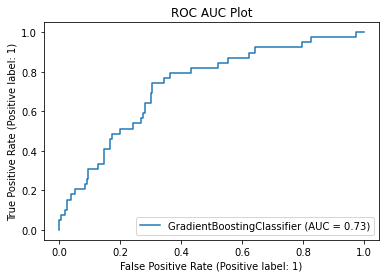

In [193]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(grid.best_estimator_,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

# 
Final Accuracy is 78% and AUC score is 73%, which depicts that our model is working fairly well

# Saving the Gradient Boosting Classifier Model

In [195]:
filename='Insurance Claim Fraud Detection.pkl'
pickle.dump(grid, open(filename,'wb'))